In [1]:
# import dependancies
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st

In [2]:
# reading the files
mouse_data_path = "data/Mouse_metadata.csv"
results_path = "data/Study_results.csv"

mouse_df = pd.read_csv(mouse_data_path)
results_df = pd.read_csv(results_path)

# combining the dfs
mouse_results = pd.merge(results_df, mouse_df, on=(["Mouse ID", "Mouse ID"]))

mouse_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [3]:
# checks for the number of mice
mice = mouse_results["Mouse ID"].unique()
number = len(mice)
number

249

In [4]:
# getting dupes
mouse_results["Mouse ID"].value_counts()

g989    13
b128    10
q787    10
s337    10
q511    10
        ..
f932     1
b447     1
u153     1
t573     1
o848     1
Name: Mouse ID, Length: 249, dtype: int64

In [5]:
# getting duplicate data
dupe_mouse = mouse_results.loc[mouse_results["Mouse ID"] == "g989"]
dupe_mouse

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:
# getting rid of the dupe by its ID
drop_mouse = mouse_results.loc[mouse_results["Mouse ID"] != "g989"]
drop_mouse.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [7]:
# checking number of mice in the df
mice = drop_mouse["Mouse ID"].unique()
number = len(mice)
number

248

In [8]:
# group by drug given
drug = drop_mouse.groupby("Drug Regimen")

# get the mean of the tumor volume for each respective drug
tumor_mean = drug["Tumor Volume (mm3)"].mean()

# get the median of the tumor volume for each respective drug
tumor_median = drug["Tumor Volume (mm3)"].median()

# get the variance of the tumor volume for each respective drug
tumor_var = drug["Tumor Volume (mm3)"].var()

# get the standard deviation of the tumor volume for each respective drug
tumor_std = drug["Tumor Volume (mm3)"].std()

# get the SEM of the tumor volume for each respective drug
tumor_sem = drug["Tumor Volume (mm3)"].sem()

# put all data generated above as a df
drug_summary = pd.DataFrame({"Mean Tumor Volume": tumor_mean, 
                             "Median Tumor Volume": tumor_median, 
                             "Tumor Volume Variance": tumor_var, 
                             "Tumor Volume Std. Dev.": tumor_std, 
                             "Tumor Volume Std. Err.": tumor_sem
})
drug_summary

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# create the same df using agg
drug_summary_two = drug["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"])
drug_summary_two

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


<AxesSubplot:title={'center':'Number of Mice per Drug Regimen'}, xlabel='Drug Regimen', ylabel='Number of Mice Tested'>

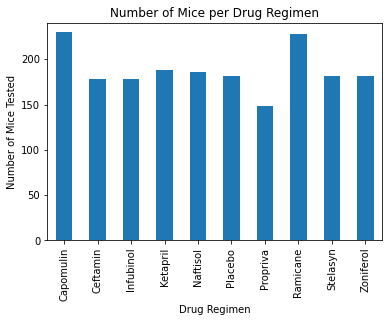

In [10]:
# creating a series of data to count the number of mice per each drug regimen
tp = drug["Timepoint"].count()
tp.plot(kind="bar", title="Number of Mice per Drug Regimen", ylabel="Number of Mice Tested", 
        ylim=(0, max(tp)+10))

<function matplotlib.pyplot.show(close=None, block=None)>

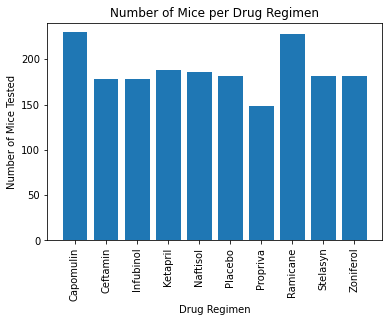

In [11]:
# put the drug names into an array and sort them alphabetically
x = drop_mouse["Drug Regimen"].unique()
x.sort()

# plot number of mice in each drug regimen
plt.bar(x, tp)
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.title("Number of Mice per Drug Regimen")
plt.xticks(rotation=90)
plt.ylim(0, max(tp)+10)
plt.show

<AxesSubplot:title={'center':'Percentage of Each Gender of Mice'}, ylabel='Sex'>

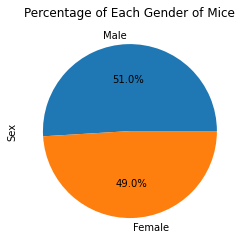

In [12]:
# count the number of males and females
mice_sex = drop_mouse["Sex"].value_counts()

# pie chart to display the data
mice_sex.plot(kind="pie", title="Percentage of Each Gender of Mice", autopct="%1.1f%%")

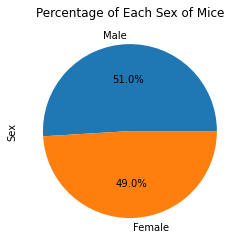

In [13]:
# creates an array for sex of mice
labels = drop_mouse["Sex"].unique()
labels= labels[::-1]

# pie chart to display data
plt.pie(mice_sex, labels=labels, autopct="%1.1f%%")
plt.title("Percentage of Each Sex of Mice")
plt.ylabel("Sex")
plt.show()

In [14]:
# group by id then find the greatest timepoint for each
mouse_group_id = drop_mouse.groupby("Mouse ID")
max_tp = mouse_group_id["Timepoint"].max()
tp = pd.DataFrame({"Timepoint": max_tp})
tp.reset_index()
tp_resetted = pd.merge(drop_mouse, tp, how="right", left_on=["Mouse ID", "Timepoint"], 
                       right_on=["Mouse ID", "Timepoint"])
tp_resetted

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [15]:
# creating a list for the most promising treaments
treatment = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# creating lists for different drugs
capo_df = tp_resetted.loc[tp_resetted["Drug Regimen"] == "Capomulin"]
capo_data = capo_df["Tumor Volume (mm3)"]

rami_df = tp_resetted.loc[tp_resetted["Drug Regimen"] == "Ramicane"]
rami_data = rami_df["Tumor Volume (mm3)"]

infu_df = tp_resetted.loc[tp_resetted["Drug Regimen"] == "Infubinol"]
infu_data = infu_df["Tumor Volume (mm3)"]

ceft_df = tp_resetted.loc[tp_resetted["Drug Regimen"] == "Ceftamin"]
ceft_data = ceft_df["Tumor Volume (mm3)"]

# combine all the lists above together
all_data = [capo_data, rami_data, infu_data, ceft_data]

In [16]:
# creating quartiles for all the drugs and stores upper/lower quartiles
capo_quart = capo_data.quantile([0.25, 0.50, 0.75])
capo_lower = capo_quart[0.25]
capo_upper = capo_quart[0.75]
capo_iqr = capo_upper-capo_lower
capo_lowerbound = capo_lower - (1.5*capo_iqr)
capo_upperbound = capo_upper + (1.5*capo_iqr)

rami_quart = rami_data.quantile([0.25, 0.50, 0.75])
rami_lower = rami_quart[0.25]
rami_upper = rami_quart[0.75]
rami_iqr = rami_upper-rami_lower
rami_lowerbound = rami_lower - (1.5*rami_iqr)
rami_upperbound = rami_upper + (1.5*rami_iqr)

infu_quart = infu_data.quantile([0.25, 0.50, 0.75])
infu_lower = infu_quart[0.25]
infu_upper = infu_quart[0.75]
infu_iqr = infu_upper-infu_lower
infu_lowerbound = infu_lower - (1.5*infu_iqr)
infu_upperbound = infu_upper + (1.5*infu_iqr)

ceft_quart = ceft_data.quantile([0.25, 0.50, 0.75])
ceft_lower = ceft_quart[0.25]
ceft_upper = ceft_quart[0.75]
ceft_iqr = ceft_upper-ceft_lower
ceft_lowerbound = ceft_lower - (1.5*ceft_iqr)
ceft_upperbound = ceft_upper + (1.5*ceft_iqr)

# calculating the outliers if any and printing them
capo_outliers = [x for x in capo_data if x < capo_lowerbound or x > capo_upperbound]
print(f"Capomulin's potential outliers: {capo_outliers}")
rami_outliers = [x for x in rami_data if x < rami_lowerbound or x > rami_upperbound]
print(f"Ramicane's potential outliers: {rami_outliers}")
infu_outliers = [x for x in infu_data if x < infu_lowerbound or x > infu_upperbound]
print(f"Infubinol's potential outliers: {infu_outliers}")
ceft_outliers = [x for x in ceft_data if x < ceft_lowerbound or x > ceft_upperbound]
print(f"Ceftamin's potential outliers: {ceft_outliers}")

Capomulin's potential outliers: []
Ramicane's potential outliers: []
Infubinol's potential outliers: [36.3213458]
Ceftamin's potential outliers: []


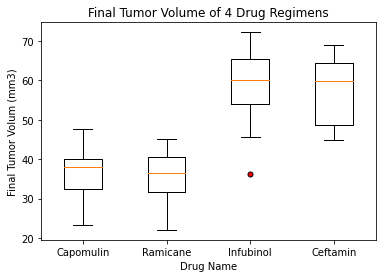

In [17]:
# box plot to determine the outlier of the drugs
fig1, ax1 = plt.subplots()
ax1.set_title("Final Tumor Volume of 4 Drug Regimens")
ax1.set_xlabel("Drug Name")
ax1.set_ylabel("Final Tumor Volum (mm3)")
flierprops = dict(marker='o', markerfacecolor='red', markersize=5,
                  linestyle='none')
ax1.boxplot(all_data, labels=treatment, flierprops=flierprops)
plt.show()

<AxesSubplot:title={'center':'Capomulin treatment of Mouse f966'}, xlabel='Timepoint', ylabel='Tumor Volume (mm3)'>

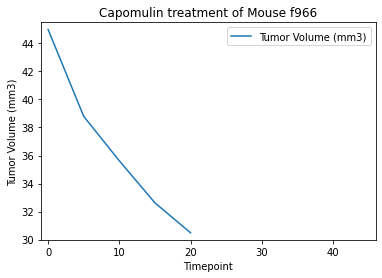

In [18]:
# line plot to show volume
f966 = drop_mouse.loc[drop_mouse["Mouse ID"] == "f966"]
f966_time_tumor = f966[["Timepoint", "Tumor Volume (mm3)"]]
f966_time_tumor = f966_time_tumor.set_index("Timepoint")
f966_time_tumor.plot(kind="line", title="Capomulin treatment of Mouse f966", ylabel="Tumor Volume (mm3)", xlim=(-1, 46), 
                     ylim=(min(f966_time_tumor["Tumor Volume (mm3)"]-0.5), max(f966_time_tumor["Tumor Volume (mm3)"]+0.5)))

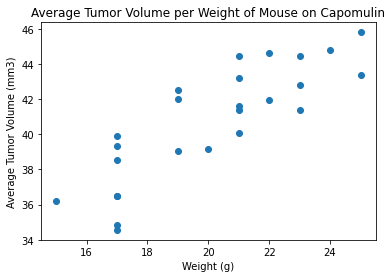

In [19]:
# scatter plot graph to show the capomulin treated mice only and groups by ID
capo_df = drop_mouse.loc[drop_mouse["Drug Regimen"] == "Capomulin"]
group_capo = capo_df.groupby("Mouse ID")

avg_tumor = group_capo["Tumor Volume (mm3)"].mean()
avg_weight = group_capo["Weight (g)"].mean()

plt.scatter(avg_weight, avg_tumor)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Average Tumor Volume per Weight of Mouse on Capomulin")
plt.show()

The correlation between mouse weight and the average tumor volume is 0.84


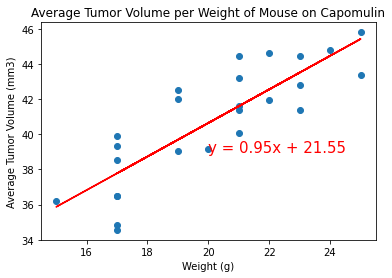

In [20]:
# setting up the linear regression line
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(avg_weight, avg_tumor)
regress_values = avg_weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# scatter plot to display avg tumor vol vs weight on capomulin
plt.scatter(avg_weight, avg_tumor)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Average Tumor Volume per Weight of Mouse on Capomulin")

plt.plot(avg_weight, regress_values, "r-")
plt.annotate(line_eq, (20, 39), fontsize=15, color="red")
print(f"The correlation between mouse weight and the average tumor volume is {round(rvalue, 2)}")
plt.show()